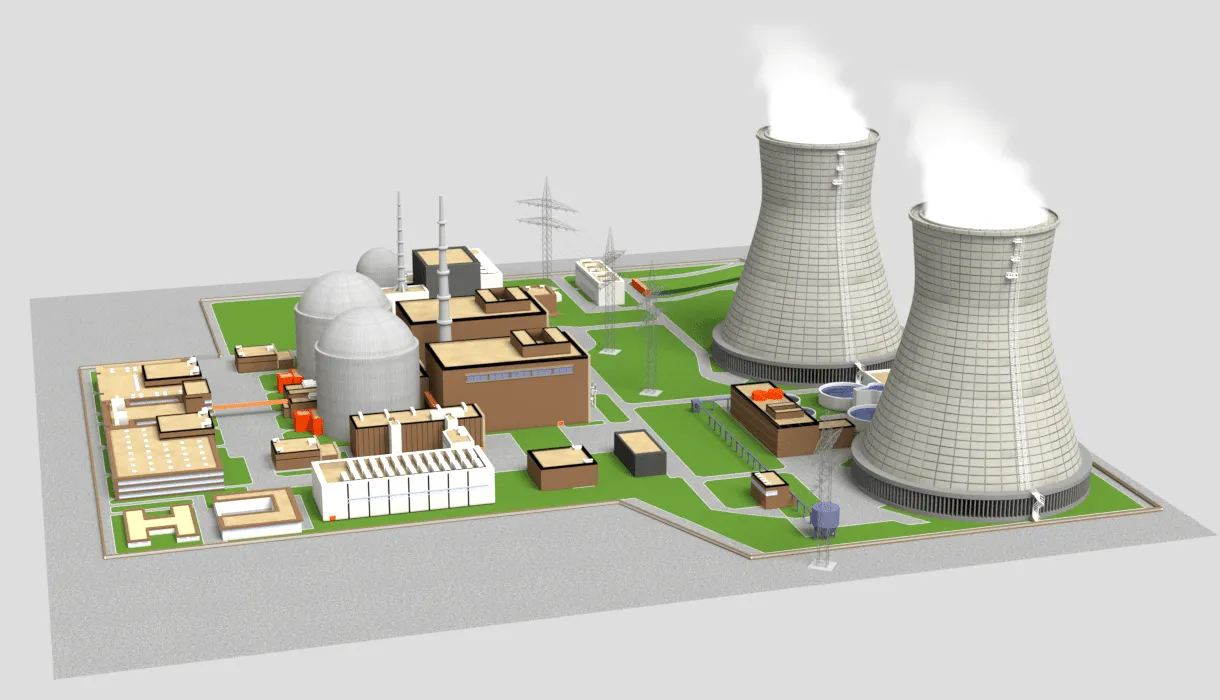

## Global Power Plant Database
### Problem Statement:
#### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Key attributes of the database
The database includes the following indicators:

* `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

* `country_long` (text): longer form of the country designation

* `name` (text): name or title of the power plant, generally in Romanized form

* `gppd_idnr` (text): 10 or 12 character identifier for the power plant

* `capacity_mw` (number): electrical generating capacity in megawatts

* `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

* `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

* `primary_fuel` (text): energy source used in primary electricity generation or export

* `other_fuel1` (text): energy source used in electricity generation or export

* `other_fuel2` (text): energy source used in electricity generation or export

* `other_fuel3` (text): energy source used in electricity generation or export

* `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 
* `owner` (text): majority shareholder of the power plant, generally in Romanized form

* `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

* `url` (text): web document corresponding to the `source` field

* `geolocation_source` (text): attribution for geolocation information

* `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

* `year_of_capacity_data` (number): year the capacity information was reported

* `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

* `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

* `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

* `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

* `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

* `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

* `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

* `generation_data_source` (text): attribution for the reported generation information

* `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

* `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

* `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

* `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

* `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

* `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

* `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

* `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

* `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

* `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

**Fuel Type Aggregation**

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction 

**1) Primary Fuel**      
**2) capacity_mw** 

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import statsmodels.api as sma
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

C:\Users\prita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\prita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


#### Importing data set

In [2]:
GPPDP=pd.read_csv('/Users/prita/Downloads/DATASETS/Capstone Project/Global Power Plant Database/database_IND.csv')

GPPDP

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Univariate Analysis

In [3]:
GPPDP.shape

(907, 27)

In [4]:
GPPDP.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
GPPDP.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [6]:
GPPDP.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

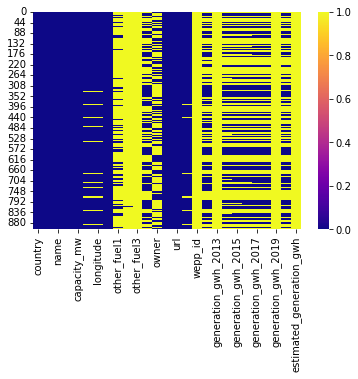

In [7]:
sns.heatmap(GPPDP.isnull(),cmap='plasma')

There are several null values. Columns other_fuel2, other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019 and estimated_generation_gwh have all null values.

Only columns country, name, capacity_mw, source, url, primary fuel have no null values.

In [8]:
GPPDP.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

columns country, otherfuel2,year_of_capacity_data, and generation_data_source only have 1 data type, which means the value is same for every row and will not affect the output.

We will drop the columns that will not affect output or have only nan values

In [9]:
columns_to_drop = ['other_fuel1','other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'owner', 'url', 'generation_gwh_2019', 'estimated_generation_gwh', 'country', 'country_long', 'name', 'gppd_idnr', 'year_of_capacity_data', 'generation_data_source']
for i in columns_to_drop:
    GPPDP.drop(i, axis=1, inplace=True)
GPPDP.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [10]:
GPPDP.shape

(907, 12)

We have removed 15 columns. These columns either had all NaN values or the same value for every row.

Now we can proceed with further analysis.

In [11]:
GPPDP.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


There is very high standard deviation in all columns except latitude and longitude due to the fact that the range is very high. The minimum values are 0 and the maximum values go up to 30000+.

In [12]:
GPPDP.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.051309,0.197129,0.304087,0.839094,0.844352,0.870620,0.886673,0.901918
latitude,0.051309,1.000000,0.036362,0.129902,0.060330,0.048610,0.041387,0.040568,0.040476
longitude,0.197129,0.036362,1.000000,0.121910,0.013511,0.022760,0.050732,0.048678,0.045599
commissioning_year,0.304087,0.129902,0.121910,1.000000,0.160014,0.170363,0.193743,0.191367,0.193694
generation_gwh_2014,0.839094,0.060330,0.013511,0.160014,1.000000,0.961098,0.937060,0.912561,0.902781
generation_gwh_2015,0.844352,0.048610,0.022760,0.170363,0.961098,1.000000,0.974918,0.940191,0.934371
generation_gwh_2016,0.870620,0.041387,0.050732,0.193743,0.937060,0.974918,1.000000,0.972024,0.962073
generation_gwh_2017,0.886673,0.040568,0.048678,0.191367,0.912561,0.940191,0.972024,1.000000,0.985856
generation_gwh_2018,0.901918,0.040476,0.045599,0.193694,0.902781,0.934371,0.962073,0.985856,1.000000


<AxesSubplot:>

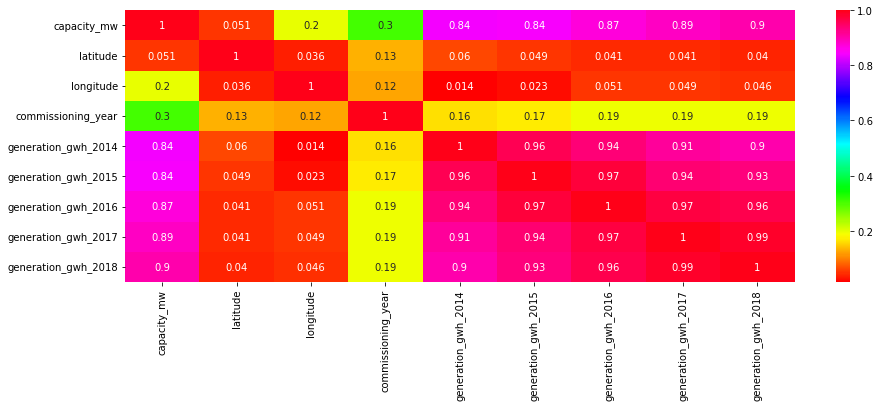

In [13]:
plt.figure(figsize=(15,5))
sns.heatmap(GPPDP.corr(), annot=True,cmap='hsv')

We can see that there is very high correlation between all the generation in gigawatt hours values for each year, and also of those high correlation of those columns with capacity_mw.

In [14]:
GPPDP.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

There is skewness in capacity_mw, and all the generation_gwh columns.

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:title={'center':'generation_gwh_2018'}>]],
      dtype=object)

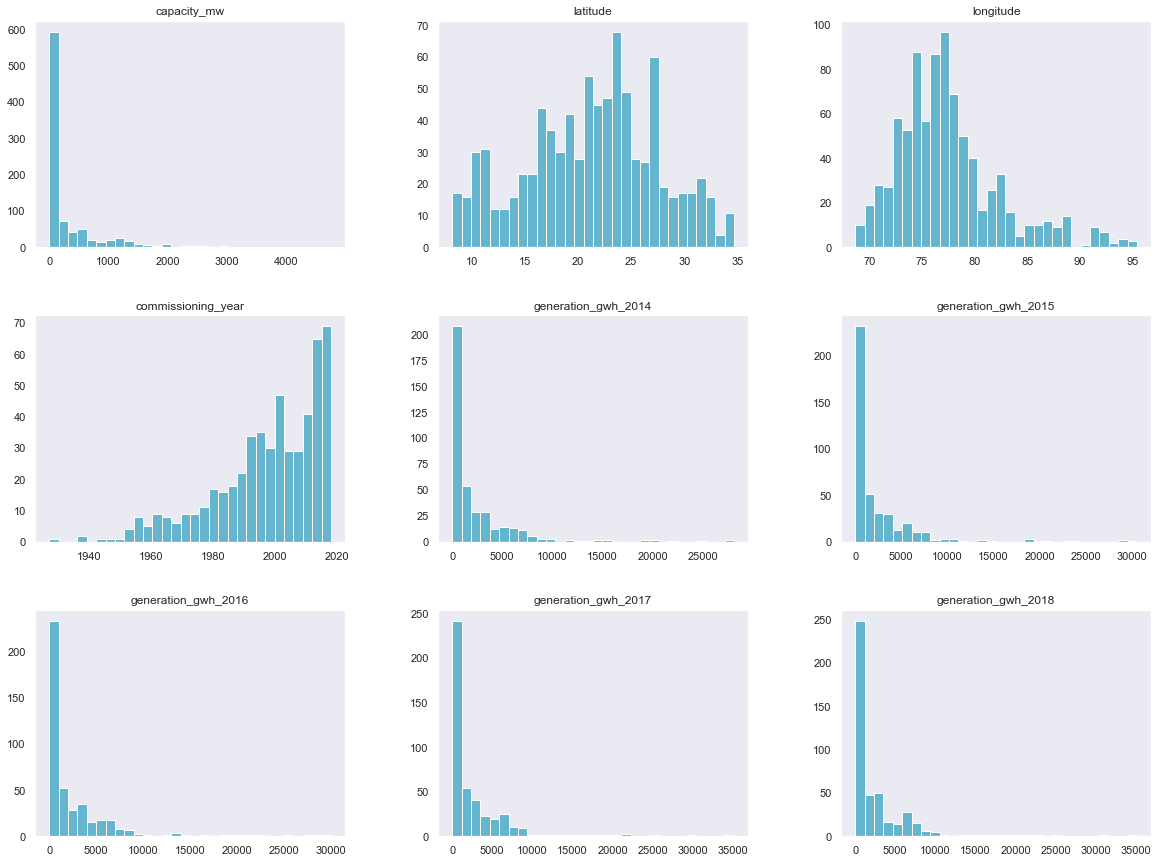

In [15]:
sns.set(style="darkgrid")

GPPDP.hist(figsize=(20,15), grid=False, layout=(3, 3), bins = 30, color='c')

There is skewness in the capacity, and generation_gwh columns of each year, as well as negative skewness ij commissioning_year as since more power plants were commissioned in the 2000s.

<AxesSubplot:>

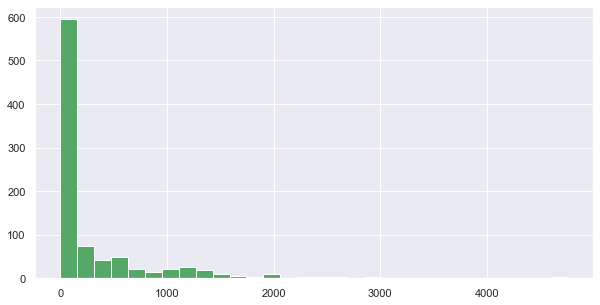

In [16]:
GPPDP['capacity_mw'].hist(figsize=(10,5), bins=30,color='g')

most powerplants have capacity in the 0-20 mw range so there is very high skewness in capacity_mw

<AxesSubplot:>

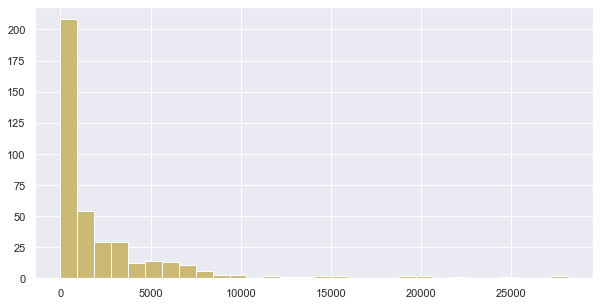

In [17]:
GPPDP['generation_gwh_2014'].hist(figsize=(10,5), bins=30,color='y')

High skewness in electricity generation in gigawatt-hours reported for the year 2014 due to high amount of low values.

<AxesSubplot:>

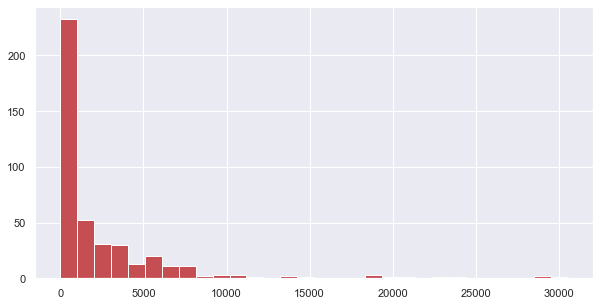

In [18]:
GPPDP['generation_gwh_2015'].hist(figsize=(10,5), bins=30,color='r')

High skewness in electricity generation in gigawatt-hours reported for the year 2015 due to high amount of low values.

<AxesSubplot:>

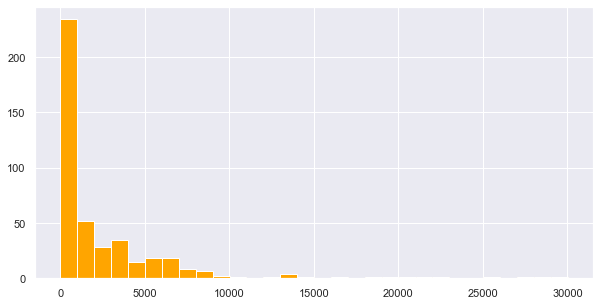

In [19]:
GPPDP['generation_gwh_2016'].hist(figsize=(10,5), bins=30,color='orange')

High skewness in electricity generation in gigawatt-hours reported for the year 2016 due to high amount of low values.

<AxesSubplot:>

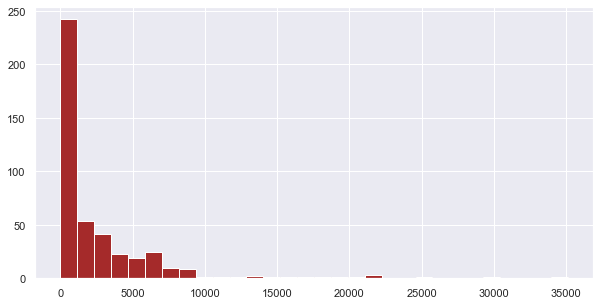

In [20]:
GPPDP['generation_gwh_2017'].hist(figsize=(10,5), bins=30,color='brown')

High skewness in electricity generation in gigawatt-hours reported for the year 2017 due to high amount of low values.

<AxesSubplot:>

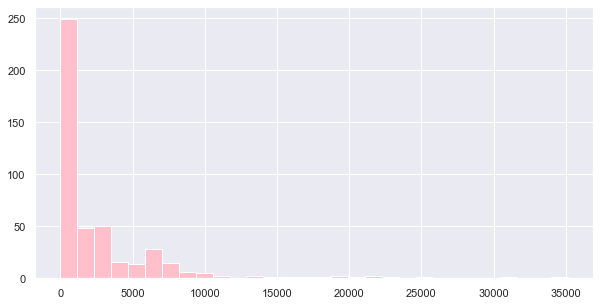

In [21]:
GPPDP['generation_gwh_2018'].hist(figsize=(10,5), bins=30,color='Pink')

High skewness in electricity generation in gigawatt-hours reported for the year 2018 due to high amount of low values.

Text(0.5, 1.0, 'Outliers in the columns')

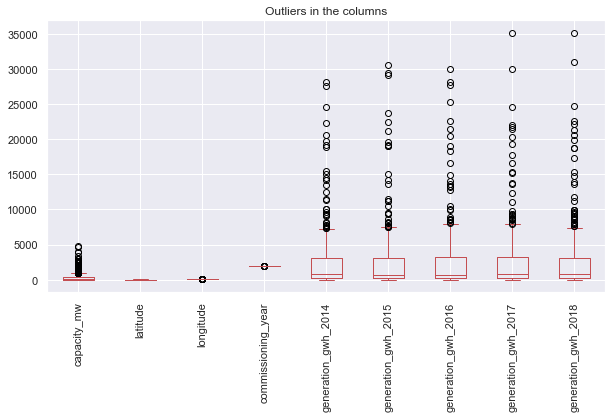

In [22]:
GPPDP.boxplot(figsize=(10,5),color='r')
plt.xticks(rotation= 90)
plt.title('Outliers in the columns')

There are several outliers present in every column except latitude.

generation_gwh column for every year has massive amount of outliers due to the high range we saw above.

<AxesSubplot:xlabel='generation_gwh_2014'>

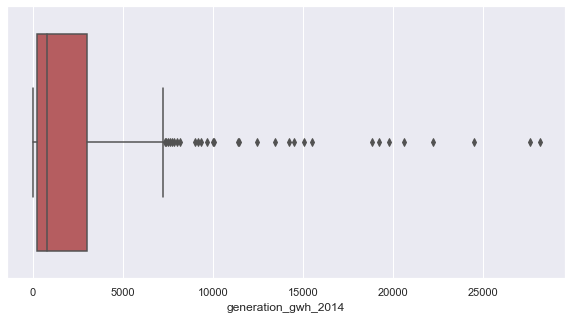

In [23]:
plt.figure(figsize = (10,5))

sns.boxplot(GPPDP['generation_gwh_2014'],color='r')

Values above 7500 are outliers in generation_gwh for 2014 and they go up to around 28000

<AxesSubplot:xlabel='generation_gwh_2015'>

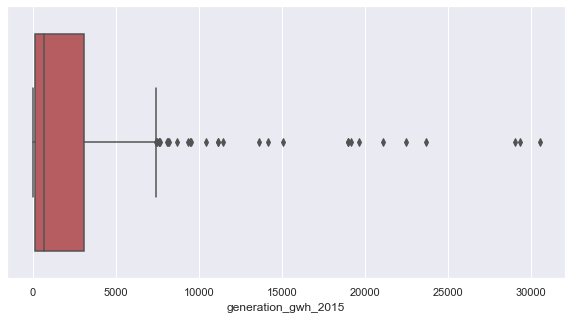

In [24]:
plt.figure(figsize = (10,5))

sns.boxplot(GPPDP['generation_gwh_2015'],color='r')

Values above 7500 are outliers in generation_gwh for 2015 and they go upto around 32000

<AxesSubplot:xlabel='generation_gwh_2016'>

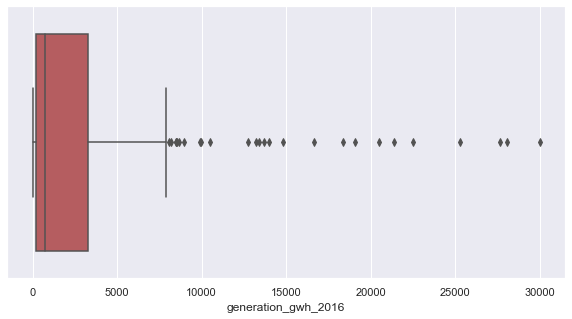

In [25]:
plt.figure(figsize = (10,5))

sns.boxplot(GPPDP['generation_gwh_2016'],color='r')

Values above 7500 are outliers in generation_gwh for 2016 and they go upto 30000

<AxesSubplot:xlabel='generation_gwh_2017'>

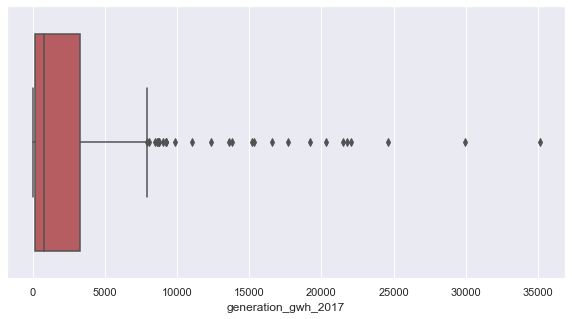

In [26]:
plt.figure(figsize = (10,5))

sns.boxplot(GPPDP['generation_gwh_2017'],color='r')

Values above 7500 are outliers in generation_gwh for 2017 and they go upto 35000, which is the highest amount so far.

<AxesSubplot:xlabel='generation_gwh_2018'>

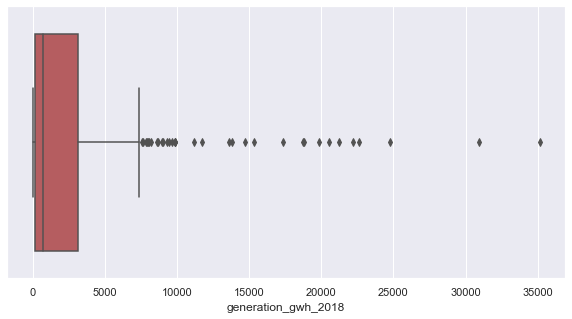

In [27]:
plt.figure(figsize = (10,5))

sns.boxplot(GPPDP['generation_gwh_2018'],color='r')

Values above 7500 are outliers in generation_gwh for 2018 and they go upto 35000 which is as high as 2017.

So, generation_gwh in 2017 and 2018 has the highest values.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

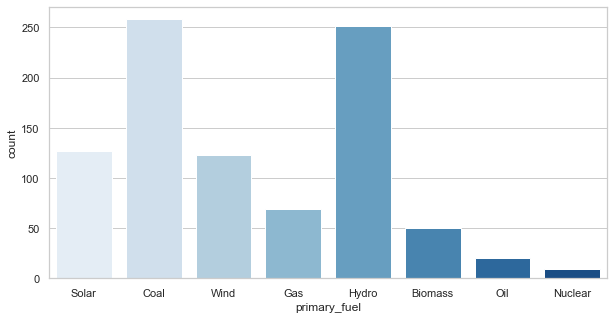

In [28]:
plt.figure(figsize = (10,5))
sns.set(style="whitegrid")

sns.countplot(GPPDP['primary_fuel'],palette="Blues")

The primary fuel for most powerplants is coal. Hydro is a close second. The least common fuel is nuclear.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, '1927.0'),
  Text(1, 0, '1937.0'),
  Text(2, 0, '1939.0'),
  Text(3, 0, '1943.0'),
  Text(4, 0, '1946.0'),
  Text(5, 0, '1949.0'),
  Text(6, 0, '1952.0'),
  Text(7, 0, '1953.0'),
  Text(8, 0, '1954.0'),
  Text(9, 0, '1955.0'),
  Text(10, 0, '1956.0'),
  Text(11, 0, '1957.0'),
  Text(12, 0, '1958.0'),
  Text(13, 0, '1959.0'),
  Text(14, 0, '1960.0'),
  Text(15, 0, '1961.0'),
  Text(16, 0, '1962.0'),
  Text(17, 0, '1963.0'),
  Text(18, 0, '1964.0'),
  Text(19, 0, '1965.0'),
  Text(20, 0, '1966.0'),
  Text(21, 0, '1967.0'),
  Text(22, 0, '1968.0'),
  Text(23, 0, '1969.0'),
  Text(24, 0, '1970.0'),
  Text(25, 0, '1971.0'),
  Text(26, 0, '1972.0'),
 

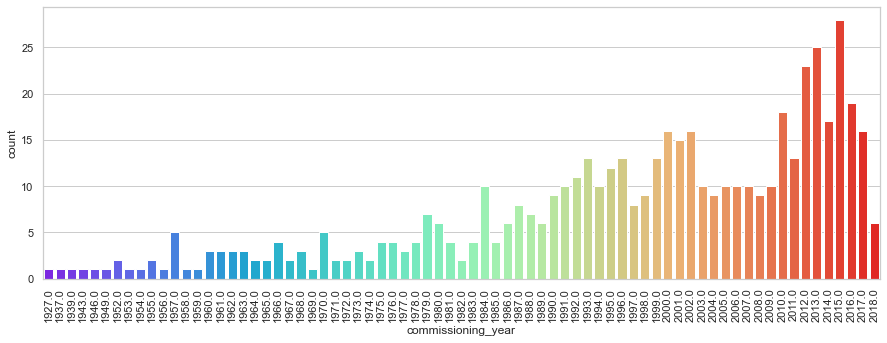

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(GPPDP['commissioning_year'],palette="rainbow")
plt.xticks(rotation=90)

The highest number of powerplants were commissioned in 2010-2017, with the single highest commission year being 2015, when around 28 powerplants were commissioned.

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

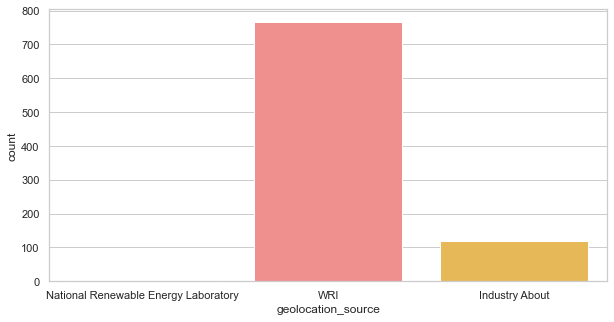

In [30]:
plt.figure(figsize=(10,5))

sns.countplot(GPPDP['geolocation_source'],palette="spring")

Most geolocation information comes from WRI, and least from National Renewable Energy.

In [31]:
GPPDP.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

### Bivariate Analysis

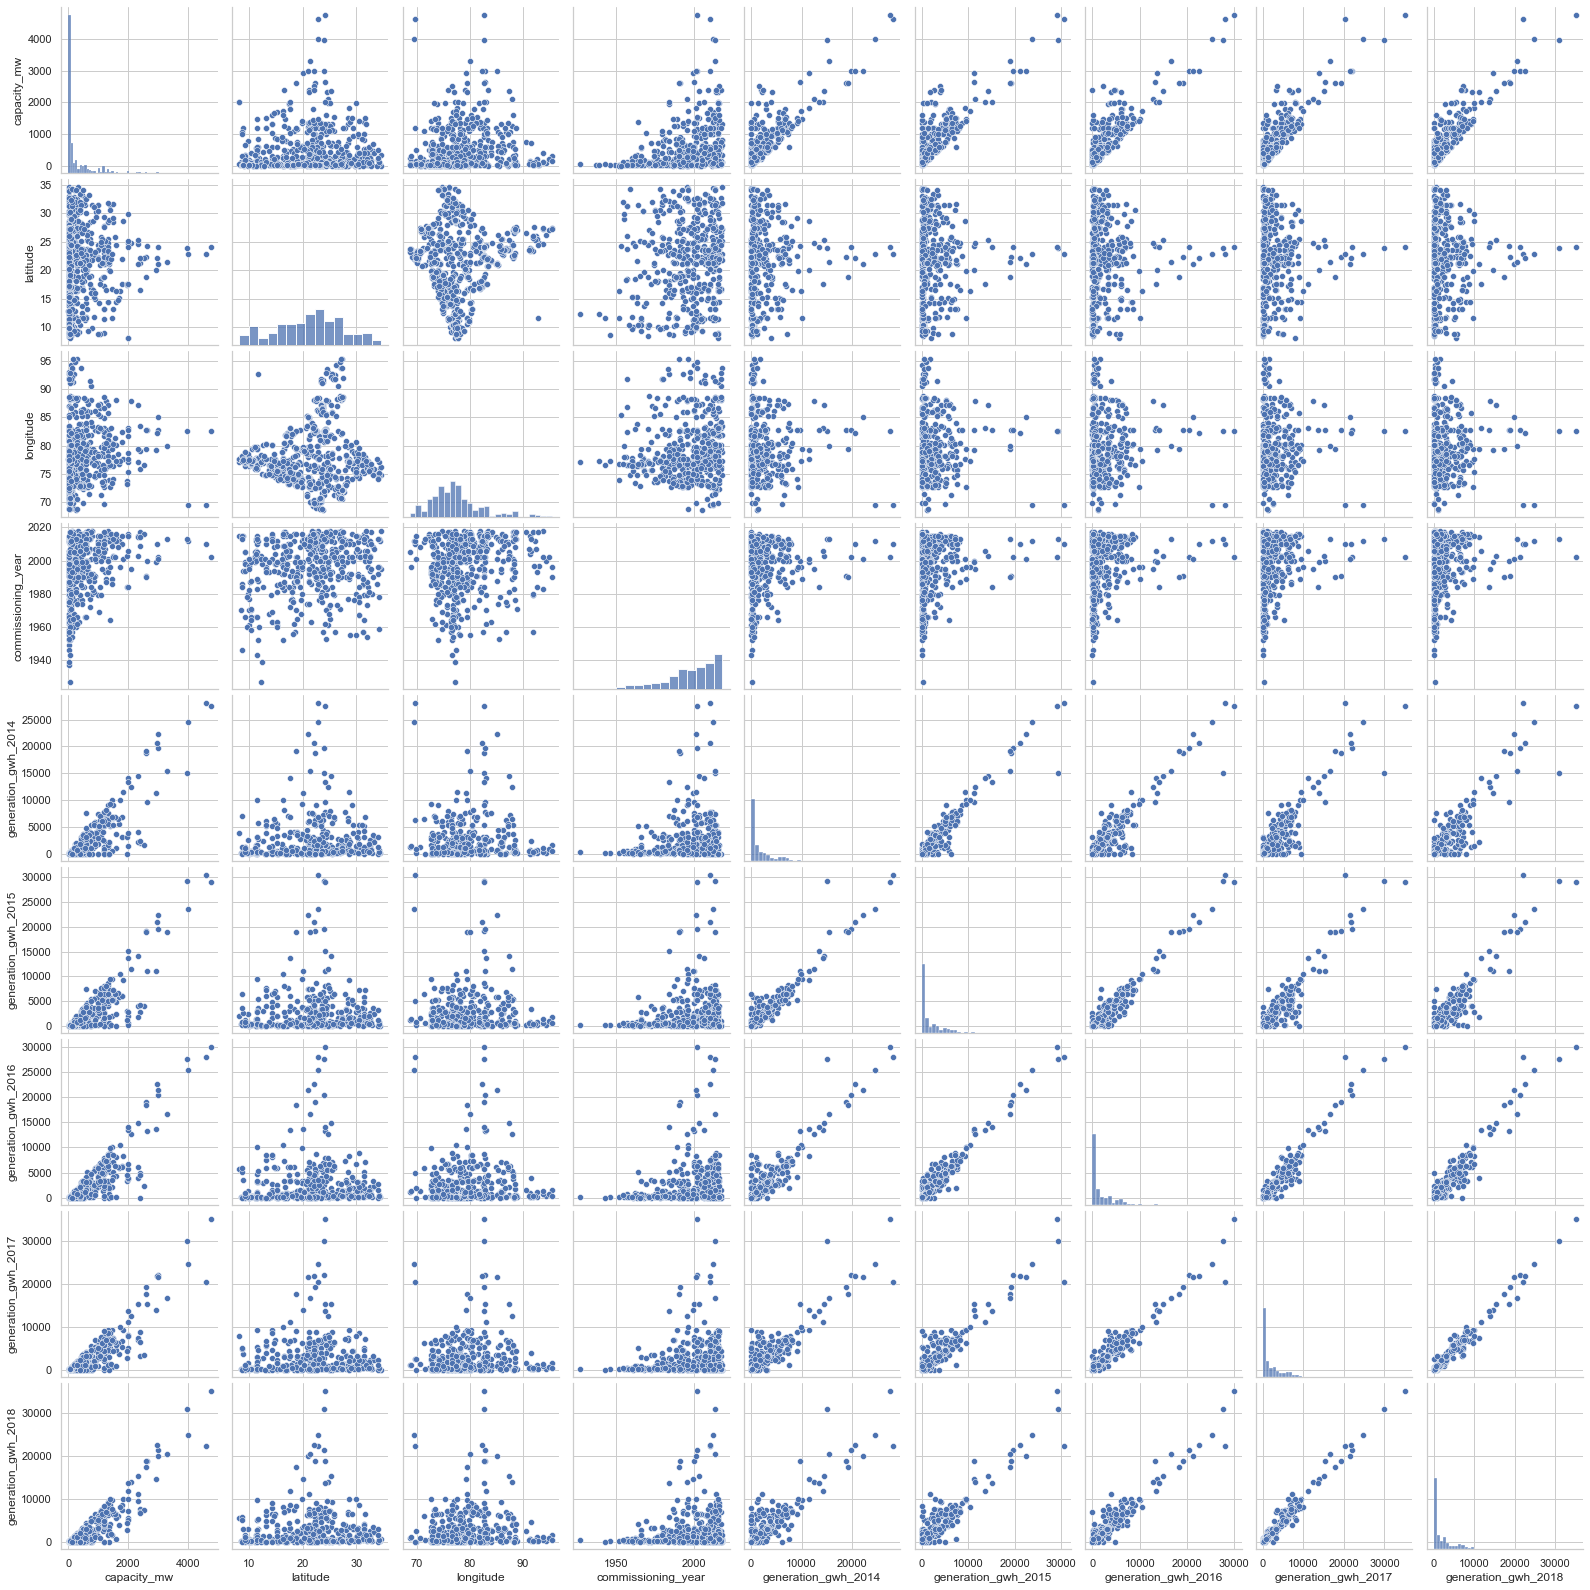

In [32]:
sns.pairplot(GPPDP)

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

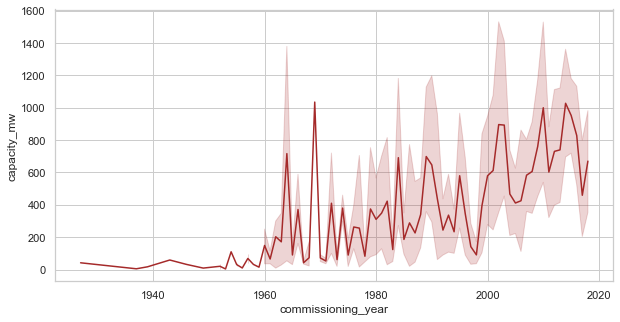

In [33]:
plt.figure(figsize=(10,5))

sns.lineplot(GPPDP['commissioning_year'], GPPDP['capacity_mw'],color='brown')

We can see that as the years gave gone by, the capacity of powerplants has increased overall.

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

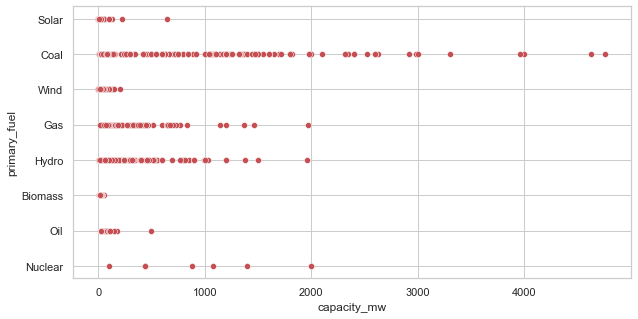

In [34]:
plt.figure(figsize=(10,5))

sns.scatterplot(GPPDP['capacity_mw'], GPPDP['primary_fuel'],color='r')

We can see that capacity for powerplants where coal is the primary fuel is higher.

<AxesSubplot:xlabel='commissioning_year', ylabel='primary_fuel'>

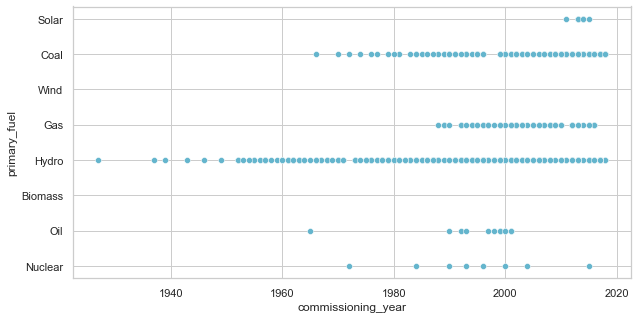

In [35]:
plt.figure(figsize=(10,5))

sns.scatterplot(GPPDP['commissioning_year'], GPPDP['primary_fuel'],color='c')

We can see that the oldest commissioned powerplants used hydro fuel. We can also see that solar fuel was only used from 2010s, and coal was used from the mid 1960s.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

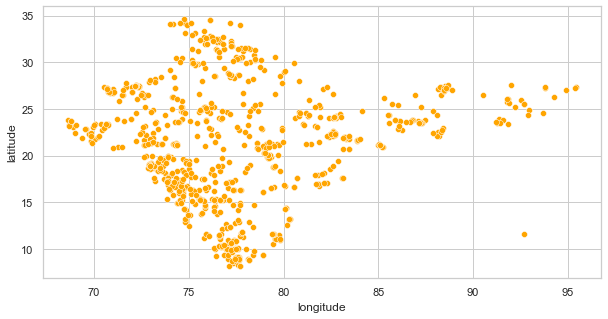

In [36]:
plt.figure(figsize=(10,5))

sns.scatterplot(GPPDP['longitude'], GPPDP['latitude'],color='Orange')

We can see that when we plot the longitude and latitude, the scatterplot looks very similar to the map of India. This means that the powerplants are spread across the country, with the majority being in the west.

<AxesSubplot:xlabel='geolocation_source', ylabel='primary_fuel'>

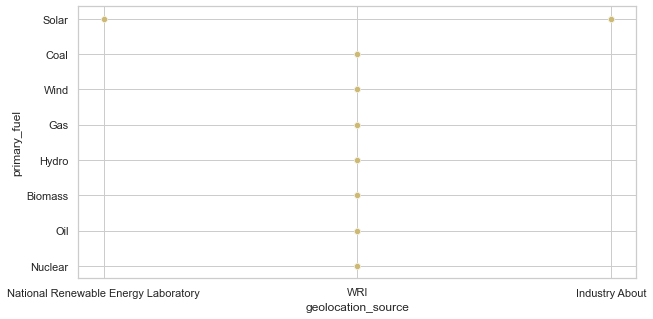

In [37]:
plt.figure(figsize=(10,5))

sns.scatterplot(GPPDP['geolocation_source'], GPPDP['primary_fuel'],color='y')

we can see that solar fuel is only used by national renewable energy lab and industry about, and WRI uses every other fuel except solar.

<AxesSubplot:xlabel='commissioning_year', ylabel='primary_fuel'>

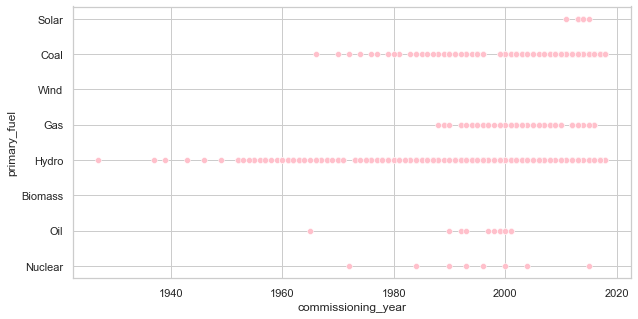

In [38]:
plt.figure(figsize=(10,5))

sns.scatterplot(GPPDP['commissioning_year'], GPPDP['primary_fuel'],color='Pink')

### Feature Engineering

#### Imputing null values

In [39]:
GPPDP.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [40]:
imp = SimpleImputer()

In [41]:
GPPDP['latitude'] = imp.fit_transform(GPPDP['latitude'].values.reshape(-1,1))
GPPDP['longitude'] = imp.fit_transform(GPPDP['longitude'].values.reshape(-1,1))

In [42]:
GPPDP.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

latitude and longitude columns no longer have null values and they have been imputed using the mean

In [43]:
imp = SimpleImputer(strategy='median')
GPPDP['generation_gwh_2014'] = imp.fit_transform(GPPDP['generation_gwh_2014'].values.reshape(-1,1))
GPPDP['generation_gwh_2015'] = imp.fit_transform(GPPDP['generation_gwh_2015'].values.reshape(-1,1))
GPPDP['generation_gwh_2016'] = imp.fit_transform(GPPDP['generation_gwh_2016'].values.reshape(-1,1))
GPPDP['generation_gwh_2017'] = imp.fit_transform(GPPDP['generation_gwh_2017'].values.reshape(-1,1))
GPPDP['generation_gwh_2018'] = imp.fit_transform(GPPDP['generation_gwh_2018'].values.reshape(-1,1))

In [44]:
GPPDP.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

we can see that the generation_gwh columns no longer have null values. The null values have been replaced by the median, as that is a more accurate representation of the center than the mean.

In [45]:
imp = SimpleImputer(strategy='most_frequent')
GPPDP['geolocation_source'] = imp.fit_transform(GPPDP['geolocation_source'].values.reshape(-1,1))

In [46]:
GPPDP['commissioning_year'] = imp.fit_transform(GPPDP['commissioning_year'].values.reshape(-1,1))

#### Categorizing by commissioning years by decades

In [47]:
GPPDP.commissioning_year.value_counts()

2015.0    408
2013.0     25
2012.0     23
2016.0     19
2010.0     18
         ... 
1946.0      1
1956.0      1
1937.0      1
1949.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [48]:
dec1 = list(range(1920,1930))
dec2 = list(range(1930,1940))
dec3 = list(range(1940,1950))
dec4 = list(range(1950,1960))
dec5 = list(range(1960,1970))
dec6 = list(range(1970,1980))
dec7 = list(range(1980,1990))
dec8 = list(range(1990,2000))
dec9 = list(range(2000,2010))
dec10 = list(range(2010,2020))

In [49]:
for i in dec1:
    GPPDP.loc[GPPDP['commissioning_year'] == i, 'commissioning_year'] = '1920s'
for i in dec2:
    GPPDP.loc[GPPDP['commissioning_year'] == i, 'commissioning_year'] = '1930s'
for i in dec3:
    GPPDP.loc[GPPDP['commissioning_year'] == i, 'commissioning_year'] = '1940s'
for i in dec4:
    GPPDP.loc[GPPDP['commissioning_year'] == i, 'commissioning_year'] = '1950s'
for i in dec5:
    GPPDP.loc[GPPDP['commissioning_year'] == i, 'commissioning_year'] = '1960s'
for i in dec6:
    GPPDP.loc[GPPDP['commissioning_year'] == i, 'commissioning_year'] = '1970s'
for i in dec7:
    GPPDP.loc[GPPDP['commissioning_year'] == i, 'commissioning_year'] = '1980s'
for i in dec8:
    GPPDP.loc[GPPDP['commissioning_year'] == i, 'commissioning_year'] = '1990s'
for i in dec9:
    GPPDP.loc[GPPDP['commissioning_year'] == i, 'commissioning_year'] = '2000s'
for i in dec10:
    GPPDP.loc[GPPDP['commissioning_year'] == i, 'commissioning_year'] = '2010s'

In [50]:
GPPDP['commissioning_year']

0      2010s
1      2010s
2      2010s
3      2000s
4      2010s
       ...  
902    2010s
903    2010s
904    2010s
905    2010s
906    2010s
Name: commissioning_year, Length: 907, dtype: object

<AxesSubplot:xlabel='commissioning_year', ylabel='count'>

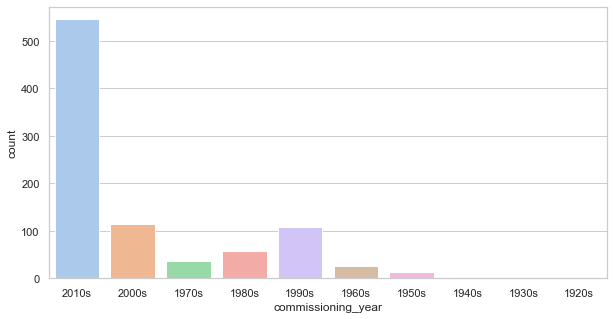

In [51]:
plt.figure(figsize=(10,5))

sns.countplot(GPPDP['commissioning_year'],palette="pastel")

We can see that most powerplants were commissioned in the 2010s decade.

### Combining generation values into an average generation_gwh column

In [52]:
GPPDP['average_generation_gwh'] = GPPDP[['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']].mean(axis=1)

In [53]:
GPPDP.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,average_generation_gwh
0,2.5,28.1839,73.2407,Solar,2010s,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,763.826415
1,98.0,24.7663,74.6090,Coal,2010s,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,763.826415
2,39.2,21.9038,69.3732,Wind,2010s,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,763.826415
3,135.0,23.8712,91.3602,Gas,2000s,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,727.510864
4,1800.0,21.9603,82.4091,Coal,2010s,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,5571.899947


so now we can drop the individual generation columns.

In [54]:
GPPDP.drop(['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'], axis=1, inplace=True)
GPPDP.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,average_generation_gwh
0,2.5,28.1839,73.2407,Solar,2010s,National Renewable Energy Laboratory,National Renewable Energy Laboratory,763.826415
1,98.0,24.7663,74.6090,Coal,2010s,Ultratech Cement ltd,WRI,763.826415
2,39.2,21.9038,69.3732,Wind,2010s,CDM,WRI,763.826415
3,135.0,23.8712,91.3602,Gas,2000s,Central Electricity Authority,WRI,727.510864
4,1800.0,21.9603,82.4091,Coal,2010s,Central Electricity Authority,WRI,5571.899947


### Removing Skewness

In [55]:
GPPDP.skew()

capacity_mw               3.123576
latitude                 -0.149698
longitude                 1.141881
average_generation_gwh    5.381489
dtype: float64

In [56]:
GPPDP['average_generation_gwh'] = np.sqrt(GPPDP['average_generation_gwh'])

In [57]:
GPPDP.skew()

capacity_mw               3.123576
latitude                 -0.149698
longitude                 1.141881
average_generation_gwh    2.610527
dtype: float64

In [58]:
GPPDP['average_generation_gwh'] = np.sqrt(GPPDP['average_generation_gwh'])

In [59]:
GPPDP.skew()

capacity_mw               3.123576
latitude                 -0.149698
longitude                 1.141881
average_generation_gwh    0.850299
dtype: float64

In [60]:
GPPDP['longitude'] = np.sqrt(GPPDP['longitude'])

In [61]:
GPPDP.skew()

capacity_mw               3.123576
latitude                 -0.149698
longitude                 1.036861
average_generation_gwh    0.850299
dtype: float64

<AxesSubplot:xlabel='longitude', ylabel='Count'>

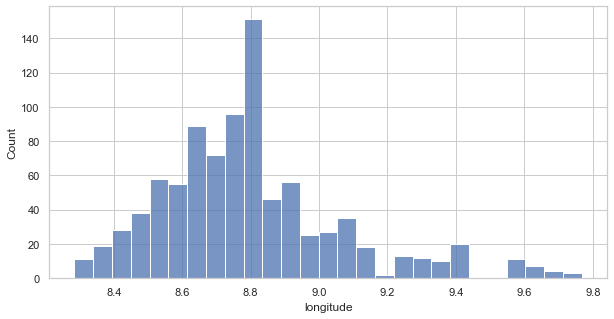

In [62]:
plt.figure(figsize=(10,5))

sns.histplot(GPPDP['longitude'])

It is now normally distributed

<AxesSubplot:ylabel='Frequency'>

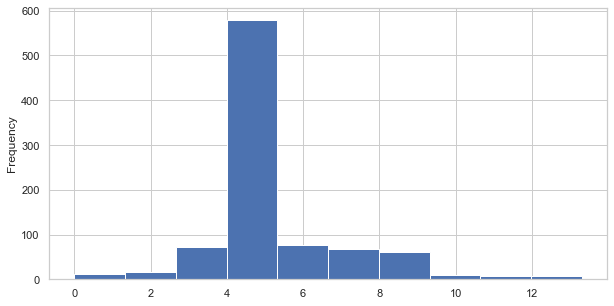

In [63]:
plt.figure(figsize=(10,5))

GPPDP['average_generation_gwh'].plot.hist()

Average generation is also normally distributed now

So, we can conclude that skewness has been removed from all numerical type columns

### Encoding object type columns

In [64]:
GPPDP.dtypes

capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year         object
source                     object
geolocation_source         object
average_generation_gwh    float64
dtype: object

In [65]:
le = LabelEncoder()
list1 = ['primary_fuel', 'commissioning_year', 'source', 'geolocation_source']
for i in list1:
    GPPDP[i] = le.fit_transform(GPPDP[i].astype(str))

In [66]:
GPPDP.dtypes

capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
commissioning_year          int32
source                      int32
geolocation_source          int32
average_generation_gwh    float64
dtype: object

In [67]:
GPPDP.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,average_generation_gwh
0,2.5,28.1839,8.558078,6,9,109,1,5.257129
1,98.0,24.7663,8.637650,1,9,174,2,5.257129
2,39.2,21.9038,8.329058,7,9,21,2,5.257129
3,135.0,23.8712,9.558253,2,8,22,2,5.193497
4,1800.0,21.9603,9.077946,1,9,22,2,8.639743


Now all the columns are numerical type.

### Checking multi-collinearity with Variance Inflation Factor

In [68]:
def vif_calc():
    vif = pd.DataFrame()
    vif['variables'] = GPPDP[0:-1].columns
    vif['VIF FACTOR'] = [variance_inflation_factor(GPPDP[0:-1].values,i) for i in range(GPPDP[0:-1].shape[1])]
    return vif

In [69]:
vif_calc()

,variables,VIF FACTOR
0,capacity_mw,3.594136
1,latitude,13.972018
2,longitude,79.078059
3,primary_fuel,4.751362
4,commissioning_year,31.024165
5,source,3.248499
6,geolocation_source,14.547560
7,average_generation_gwh,27.198236


There is slightly high vif factor in longitude

<AxesSubplot:>

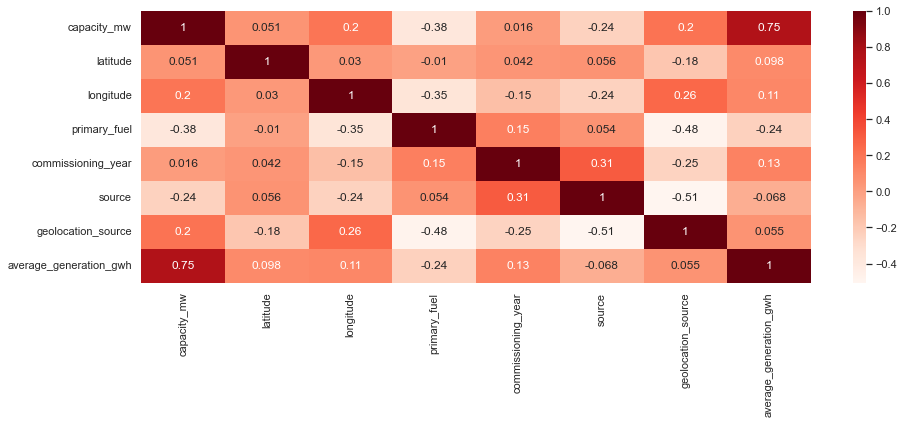

In [70]:
plt.figure(figsize=(15,5))
sns.heatmap(GPPDP.corr(), annot=True,cmap='Reds')

The correlation amongst columns is at a very normal level so we do not need to remove any columns.

### Splitting data for training and testing

#### First we will do classification training and testing by using primary fuel as the output.

### Moving output column to the end

In [71]:
fuel = GPPDP['primary_fuel']
GPPDP.drop('primary_fuel', axis=1, inplace=True)
GPPDP['primary_fuel'] = fuel
GPPDP.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,average_generation_gwh,primary_fuel
0,2.5,28.1839,8.558078,9,109,1,5.257129,6
1,98.0,24.7663,8.637650,9,174,2,5.257129,1
2,39.2,21.9038,8.329058,9,21,2,5.257129,7
3,135.0,23.8712,9.558253,8,22,2,5.193497,2
4,1800.0,21.9603,9.077946,9,22,2,8.639743,1


In [72]:
x = GPPDP.iloc[:,0:-1]
x

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,average_generation_gwh
0,2.5,28.1839,8.558078,9,109,1,5.257129
1,98.0,24.7663,8.637650,9,174,2,5.257129
2,39.2,21.9038,8.329058,9,21,2,5.257129
3,135.0,23.8712,9.558253,8,22,2,5.193497
4,1800.0,21.9603,9.077946,9,22,2,8.639743
...,...,...,...,...,...,...,...
902,1600.0,16.2949,8.795271,9,22,2,4.769605
903,3.0,12.8932,8.841120,9,77,0,5.257129
904,25.5,15.2758,8.693739,9,21,2,5.257129
905,80.0,24.3500,8.587648,9,59,2,5.257129


In [73]:
y = GPPDP.iloc[:,-1]
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 907, dtype: int32

### Models

In [74]:
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [75]:
models = [knn, svc, dtc, rf]

### Finding best random state

In [76]:
best_random_state = 0
best_score = 0
for i in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=i)
    rf.fit(xtrain,ytrain)
    pred = rf.predict(xtest)
    score = accuracy_score(ytest, pred)
    print(f'At random score {i}, accuracy score is {score}')
    if score > best_score:
        best_score = score
        best_random_state = i
print(f'Best score is {best_score} at random state {best_random_state}')

At random score 0, accuracy score is 0.8516483516483516
At random score 1, accuracy score is 0.8131868131868132
At random score 2, accuracy score is 0.8351648351648352
At random score 3, accuracy score is 0.8626373626373627
At random score 4, accuracy score is 0.8626373626373627
At random score 5, accuracy score is 0.8571428571428571
At random score 6, accuracy score is 0.8351648351648352
At random score 7, accuracy score is 0.8406593406593407
At random score 8, accuracy score is 0.8791208791208791
At random score 9, accuracy score is 0.8901098901098901
At random score 10, accuracy score is 0.8296703296703297
At random score 11, accuracy score is 0.8626373626373627
At random score 12, accuracy score is 0.8186813186813187
At random score 13, accuracy score is 0.8571428571428571
At random score 14, accuracy score is 0.8901098901098901
At random score 15, accuracy score is 0.8736263736263736
At random score 16, accuracy score is 0.8131868131868132
At random score 17, accuracy score is 0.8

We will proceed with random state 54

In [77]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=54)

In [78]:
for i in models:
    i.fit(xtrain,ytrain)
    training_score = cross_val_score(i, xtrain, ytrain, cv=5)
    pred = i.predict(xtest)
    score = accuracy_score(ytest, pred)
    print(f'Model {i} had training score of {training_score.mean()*100}% and an accuracy score of {score}')

Model KNeighborsClassifier() had training score of 63.172413793103445% and an accuracy score of 0.5494505494505495
Model SVC() had training score of 52.275862068965516% and an accuracy score of 0.44505494505494503
Model DecisionTreeClassifier() had training score of 78.48275862068965% and an accuracy score of 0.8571428571428571
Model RandomForestClassifier() had training score of 83.72413793103448% and an accuracy score of 0.9175824175824175


 We will proceed with random forest classifier.

In [79]:
parameters = { 
    'n_estimators': [200, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': range(1,5)
}

In [80]:
grid = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)

In [81]:
grid.fit(xtrain, ytrain)
grid.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

 These are the parameters we will put in the model for final training and testing.

In [82]:
rf = RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2, n_estimators=200)

In [83]:
cross_val_score(rf, xtrain,ytrain,cv=5)

array([0.86206897, 0.86896552, 0.82758621, 0.84137931, 0.8       ])

In [84]:
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
print(f'The cross validated score of this model is: {(cross_val_score(rf, xtrain,ytrain,cv=5).mean())*100}')

The cross validated score of this model is: 84.27586206896551


In [85]:
print(f'The accuracy score is {accuracy_score(ytest, pred)}')

The accuracy score is 0.9230769230769231


In [86]:
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

[[12  2  0  0  0  0  0  0]
 [ 0 46  0  2  0  0  0  1]
 [ 1  3  6  1  0  0  0  0]
 [ 0  3  0 45  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.84      0.94      0.88        49
           2       1.00      0.55      0.71        11
           3       0.94      0.94      0.94        48
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        26
           7       0.97      1.00      0.98        32

    accuracy                           0.92       182
   macro avg       0.83      0.78      0.80       182
weighted avg       0.92      0.92      0.92       182



### Conclusion of classification: Random Forest Classifier is the best model with cross val score of 84.27 and accuracy score of 92.30%

 Regression training and testing using capacity_mw as output

Moving output column to the end

In [87]:
capacity = GPPDP['capacity_mw']
GPPDP.drop('capacity_mw', axis=1, inplace=True)
GPPDP['capacity_mw'] = capacity
GPPDP.head()

,latitude,longitude,commissioning_year,source,geolocation_source,average_generation_gwh,primary_fuel,capacity_mw
0,28.1839,8.558078,9,109,1,5.257129,6,2.5
1,24.7663,8.637650,9,174,2,5.257129,1,98.0
2,21.9038,8.329058,9,21,2,5.257129,7,39.2
3,23.8712,9.558253,8,22,2,5.193497,2,135.0
4,21.9603,9.077946,9,22,2,8.639743,1,1800.0


In [88]:
x = GPPDP.iloc[:,0:-1]
x

,latitude,longitude,commissioning_year,source,geolocation_source,average_generation_gwh,primary_fuel
0,28.1839,8.558078,9,109,1,5.257129,6
1,24.7663,8.637650,9,174,2,5.257129,1
2,21.9038,8.329058,9,21,2,5.257129,7
3,23.8712,9.558253,8,22,2,5.193497,2
4,21.9603,9.077946,9,22,2,8.639743,1
...,...,...,...,...,...,...,...
902,16.2949,8.795271,9,22,2,4.769605,1
903,12.8932,8.841120,9,77,0,5.257129,6
904,15.2758,8.693739,9,21,2,5.257129,7
905,24.3500,8.587648,9,59,2,5.257129,1


In [89]:
y = GPPDP.iloc[:,-1]
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

### Models

In [90]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()
knnr = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [91]:
models = [lr, ridge, lasso, en, knnr, svr, dtr, rfr]

### Finding best random state

In [92]:
best_random_state = 0
lowest_error = 100000
for i in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=i)
    lr.fit(xtrain,ytrain)
    pred = lr.predict(xtest)
    error = mean_squared_error(ytest, pred)
    print(f'At random score {i}, mean squared error is {error}')
    if error < lowest_error:
        lowest_error = error
        best_random_state = i
print(f'Lowest error is {lowest_error} at random state {best_random_state}')

At random score 0, mean squared error is 144839.62727325057
At random score 1, mean squared error is 125389.3649172008
At random score 2, mean squared error is 116114.25612889054
At random score 3, mean squared error is 89228.81148869752
At random score 4, mean squared error is 112166.07846367001
At random score 5, mean squared error is 137285.98869823985
At random score 6, mean squared error is 150562.18308577215
At random score 7, mean squared error is 153102.01263893011
At random score 8, mean squared error is 98032.31591836609
At random score 9, mean squared error is 184503.33256639962
At random score 10, mean squared error is 143068.77506981295
At random score 11, mean squared error is 123814.31333224557
At random score 12, mean squared error is 90935.9080379883
At random score 13, mean squared error is 118530.29880475586
At random score 14, mean squared error is 120629.14835696004
At random score 15, mean squared error is 122991.77629996296
At random score 16, mean squared error 

We will proceed with random state 18

In [93]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=18)

In [94]:
for i in models:
    i.fit(xtrain,ytrain)
    pred = i.predict(xtest)
    error = mean_squared_error(ytest, pred)
    training_score = cross_val_score(i, xtrain, ytrain, cv=5)
    print(f'Model {i} had training score of {training_score.mean()*100}% and a mean squared error of {round(error, 2)}')

Model LinearRegression() had training score of 60.27751257713662% and a mean squared error of 79261.36
Model Ridge() had training score of 60.282588210758206% and a mean squared error of 79234.89
Model Lasso() had training score of 60.30042312489924% and a mean squared error of 79093.16
Model ElasticNet() had training score of 60.149046153590255% and a mean squared error of 75109.64
Model KNeighborsRegressor() had training score of 77.36291477125198% and a mean squared error of 64733.09
Model SVR() had training score of -17.019523637792435% and a mean squared error of 250073.2
Model DecisionTreeRegressor() had training score of 68.29778349124739% and a mean squared error of 81069.25
Model RandomForestRegressor() had training score of 82.555409650262% and a mean squared error of 42098.47


We will proceed with random forest regressor

In [95]:
parameters = {'criterion': ['squared_error', 'absolute_error', 'poisson'],
              "n_estimators": [200,500],
              'min_samples_leaf': [1, 2],
              "min_samples_split" : [2,4]}

In [96]:
grid = GridSearchCV(rfr, parameters, cv=5, n_jobs=-1)

In [97]:
grid.fit(xtrain, ytrain)
grid.best_params_

{'criterion': 'poisson',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 200}

These are the parameters we will put in the model for final training and testing.

In [98]:
rfr = RandomForestRegressor(criterion='poisson', min_samples_leaf=2, min_samples_split=4, n_estimators=200)

In [99]:
rfr.fit(xtrain, ytrain)
pred = rfr.predict(xtest)
print(f'The cross validated score of this model is: {(cross_val_score(rfr, xtrain,ytrain,cv=5).mean())*100}')

The cross validated score of this model is: 83.40639197297179


In [100]:
print(f'The mean squared error is {mean_squared_error(ytest, pred)}')

The mean squared error is 40437.70238785541


In [101]:
print(f'The r2 score is {r2_score(ytest, pred)}')

The r2 score is 0.808976269232144


### Conclusion: Random Forest Regressor is the best model with cross val score of 83.40, r2 score of 80.89% and with mean squared error of 40437.70

### Saving best models

### Best classification model

In [102]:
import pickle
filename = 'powerplantclassification.pkl'
pickle.dump(rf, open(filename, 'wb'))

### Best regression model

In [103]:
import pickle
filename = 'powerplantregression.pkl'
pickle.dump(rfr, open(filename, 'wb'))